In [1]:
import glob
import os

folderpath = os.getenv('data')
folderpath=os.path.join(folderpath,'results','*','*','*')
list_of_files = glob.glob(folderpath) # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getmtime)
print(latest_file)

Z:\PotassiumData\results\2023-03-09\17\000000020-TOF_MOT.h5


In [2]:
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

f = h5py.File(latest_file)
data = f['datasets']
images = data['img_all']

In [3]:
from kexp.analysis.image_processing.compute_ODs import compute_ODs

_, ODs, summedODx, summedODy = compute_ODs(images)

In [4]:
plt.set_cmap("magma")

<Figure size 640x480 with 0 Axes>

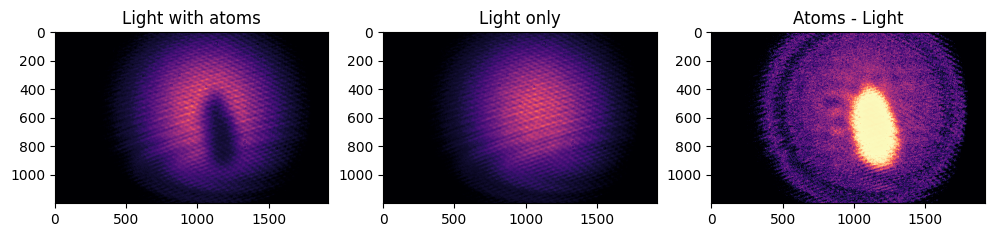

In [5]:
plt.figure(figsize=(12,3))
idx = 0
img0 = data['img_atoms'][idx]
img1 = data['img_light'][idx]
img2 = data['img_dark'][idx]
plt.subplot(1,3,1)
plt.imshow(img0)
plt.title("Light with atoms")
plt.subplot(1,3,2)
plt.imshow(img1)
plt.title("Light only")
plt.subplot(1,3,3)
plt.imshow(img0-img1)
plt.title("Atoms - Light")
plt.show()

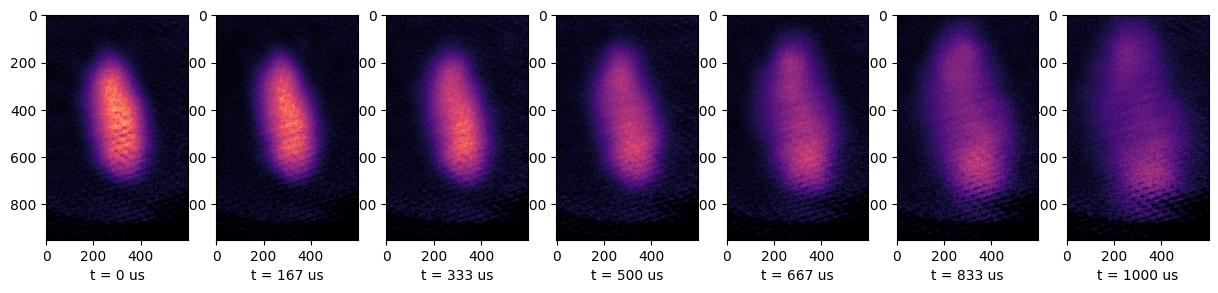

In [6]:
fig, ax = plt.subplots(1,len(ODs))
t_tof = data['t_tof_list_s']
for i in range(len(ODs)):
    ax[i].imshow(ODs[i])
    ax[i].set_xlabel(f"t = {t_tof[i]*1.e6:1.0f} us")
fig.set_figheight(3)
fig.set_figwidth(15)
plt.show() 

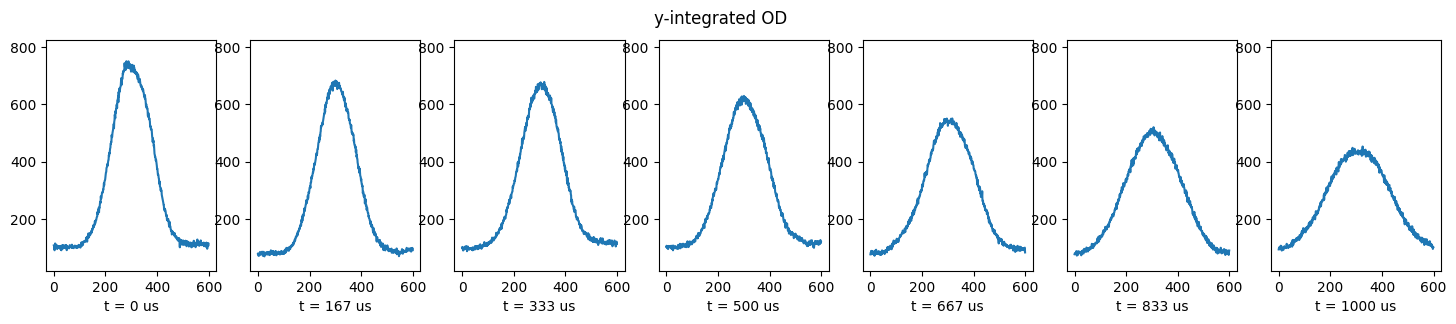

In [7]:
fig, ax = plt.subplots(1,len(summedODx))
t_tof = data['t_tof_list_s']
for i in range(len(summedODx)):
    ax[i].plot(summedODx[i])
    ax[i].set_xlabel(f"t = {t_tof[i]*1.e6:1.0f} us")
    ax[i].set_ylim(20,1.1*np.max(summedODx[0]))
fig.set_figheight(3)
fig.set_figwidth(18)
fig.suptitle("y-integrated OD")
plt.show() 

In [8]:
import kexp.analysis.image_processing.compute_gaussian_cloud_params as cgcp
fits = cgcp.fit_gaussian_summedOD(summedODx)

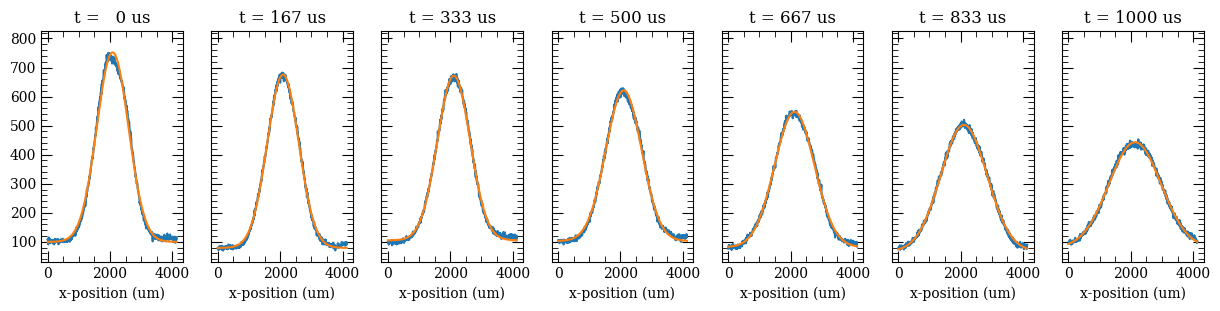

In [36]:
fig, ax = plt.subplots(1,len(fits),figsize=(15,3))

for idx in range(len(fits)):

    yfit = fits[idx].y_fitdata
    ydata = fits[idx].ydata
    xdata = fits[idx].xdata

    ax[idx].plot(xdata*1.e6,ydata)
    ax[idx].plot(xdata*1.e6,yfit)
    ax[idx].set_ylim([30,1.1*np.max(fits[0].ydata)])
    ax[idx].set_xlabel("x-position (um)")
    ax[idx].set_title(f"t = {t_tof[idx]*1.e6:3.0f} us")

    if idx != 0:
        ax[idx].set_yticklabels([])

plt.show()

In [10]:
widths = np.array([x.sigma for x in fits])
t = np.array(data['t_tof_list_s'])

In [11]:
from kexp.analysis.fitting.fit_gaussian_temperature import GaussianTemperatureFit
fit_T = GaussianTemperatureFit(t, widths)

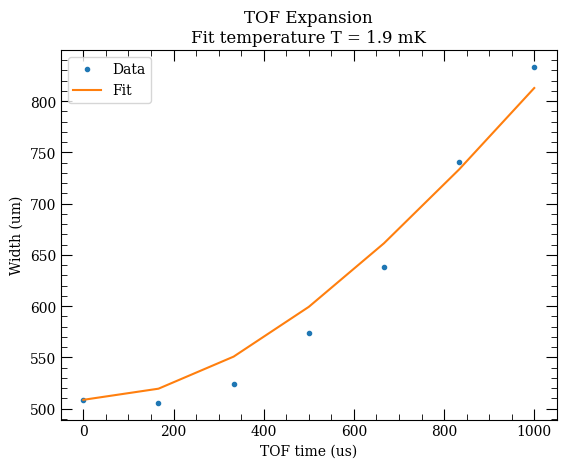

In [14]:
plt.figure()
plt.plot(t * 1.e6, widths * 1.e6, '.')
plt.plot(t * 1.e6, fit_T.y_fitdata * 1.e6)
plt.ylabel("Width (um)")
plt.xlabel("TOF time (us)")
plt.title(f"TOF Expansion\nFit temperature T = {float(fit_T.T) * 1.e3:1.1f} mK")
plt.legend(["Data","Fit"])
plt.show()

In [13]:
fit_T.T

array([0.00188312])